# Load Libraries and Dataset

In [43]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict

df = pd.read_csv('bank-full.csv', delimiter=';')

print(f"Total number of instances : {len(df)}")

for i in df.columns :
    num_nan = df[i].isnull().sum()
    if num_nan > 0:
        print(f"{i} column has {num_nan} NaN values")

df.head()

Total number of instances : 45211


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Dataset Description

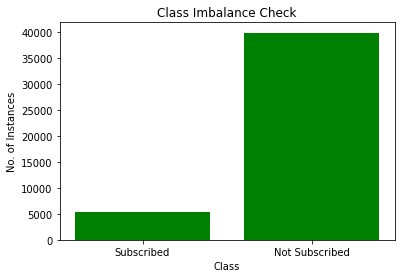

Class Labels : ['yes', 'no']
No. of Inst. : [5289, 39922]

Total number of features : 16


In [44]:
y = list(df['y'])
instances_per_class = {'yes' : y.count('yes'), 'no' : y.count('no')}

plt.bar([0, 1], instances_per_class.values(), color='green')
plt.xlabel('Class')
plt.ylabel('No. of Instances')
plt.title('Class Imbalance Check')
plt.xticks([0, 1], ['Subscribed', 'Not Subscribed'])
plt.show()

print(f"Class Labels : {list(instances_per_class.keys())}\nNo. of Inst. : {list(instances_per_class.values())}\n\nTotal number of features : {len(df.columns)-1}")

In [45]:
y = df['y']
X = df.drop('y', axis=1)

unique_val_count = {}

for col in X.columns:
    unique_values = np.unique(X[col])
    unique_val_count[col] = len(unique_values)

unique_val_count

{'age': 77,
 'job': 12,
 'marital': 3,
 'education': 4,
 'default': 2,
 'balance': 7168,
 'housing': 2,
 'loan': 2,
 'contact': 3,
 'day': 31,
 'month': 12,
 'duration': 1573,
 'campaign': 48,
 'pdays': 559,
 'previous': 41,
 'poutcome': 4}

# Categorical to Numerical

In [46]:
unique_val_count = {}

cat = list(X.columns)
cat.remove('age')
cat.remove('balance')
cat.remove('duration')
cat.remove('pdays')
cat.remove('campaign')
cat.remove('previous')

for col in X.columns:
    if col not in cat:
        continue
    unique_values = np.unique(X[col])
    temp = defaultdict(int)
    for val in X[col]:
        temp[val] += 1
    unique_val_count[col] = temp

print(f"Number of Categorical columns : {len(unique_val_count.keys())}")

for col, attr in unique_val_count.items():
    map_val = {}
    count = 0
    for key in attr.keys():
        map_val[key] = count
        count += 1
    X[col] = X[col].map(map_val)

X.head(10)

Number of Categorical columns : 10


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,0,0,0,0,2143,0,0,0,0,0,261,1,-1,0,0
1,44,1,1,1,0,29,0,0,0,0,0,151,1,-1,0,0
2,33,2,0,1,0,2,0,1,0,0,0,76,1,-1,0,0
3,47,3,0,2,0,1506,0,0,0,0,0,92,1,-1,0,0
4,33,4,1,2,0,1,1,0,0,0,0,198,1,-1,0,0
5,35,0,0,0,0,231,0,0,0,0,0,139,1,-1,0,0
6,28,0,1,0,0,447,0,1,0,0,0,217,1,-1,0,0
7,42,2,2,0,1,2,0,0,0,0,0,380,1,-1,0,0
8,58,5,0,3,0,121,0,0,0,0,0,50,1,-1,0,0
9,43,1,1,1,0,593,0,0,0,0,0,55,1,-1,0,0


In [47]:
unique_val_count.keys()

dict_keys(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome'])

# Visualization of Categorical Features

In [48]:
cross_tables = []
for i in unique_val_count.keys():
    cross_tables.append(pd.crosstab(X[i], y))

### Job type vs Subscription Status

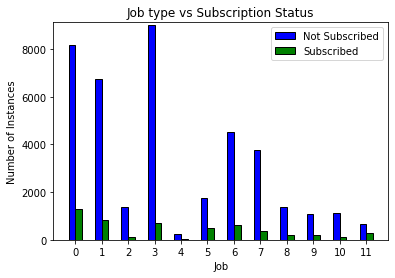

In [49]:
width = 0.25
plt.bar(np.arange(0, len(cross_tables[0])), cross_tables[0]['no'], color='blue', width=width, edgecolor='black', label='Not Subscribed')
plt.bar(np.arange(0, len(cross_tables[0]))+width, cross_tables[0]['yes'], width=width, color='green', edgecolor='black', label='Subscribed')
plt.xticks(np.arange(0, len(cross_tables[0])) + width/2, range(len(cross_tables[0])))
plt.xlabel('Job')
plt.ylabel('Number of Instances')
plt.ylim([0, max((list(cross_tables[0]['no'])) + list(cross_tables[0]['yes']))+100])
plt.legend()
plt.title('Job type vs Subscription Status')
plt.show()

### Marital Status vs Subscription Status

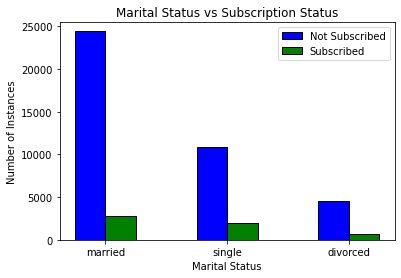

In [50]:
width = 0.25
plt.bar(np.arange(0, len(cross_tables[1])), cross_tables[1]['no'], color='blue', width=width, edgecolor='black', label='Not Subscribed')
plt.bar(np.arange(0, len(cross_tables[1]))+width, cross_tables[1]['yes'], width=width, color='green', edgecolor='black', label='Subscribed')
plt.xticks(np.arange(0, len(cross_tables[1])) + width/2, unique_val_count['marital'].keys())
plt.xlabel('Marital Status')
plt.ylabel('Number of Instances')
plt.ylim([0, max((list(cross_tables[1]['no'])) + list(cross_tables[1]['yes']))+1000])
plt.legend()
plt.title('Marital Status vs Subscription Status')
plt.show()

### Education vs Subscription Status

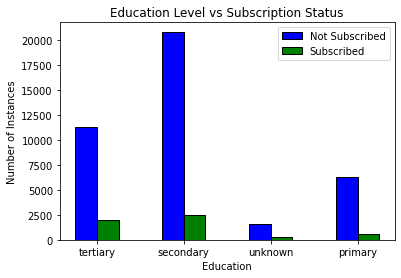

In [51]:
width = 0.25
plt.bar(np.arange(0, len(cross_tables[2])), cross_tables[2]['no'], color='blue', width=width, edgecolor='black', label='Not Subscribed')
plt.bar(np.arange(0, len(cross_tables[2]))+width, cross_tables[2]['yes'], width=width, color='green', edgecolor='black', label='Subscribed')
plt.xticks(np.arange(0, len(cross_tables[2])) + width/2, unique_val_count['education'].keys())
plt.xlabel('Education')
plt.ylabel('Number of Instances')
plt.ylim([0, max((list(cross_tables[2]['no'])) + list(cross_tables[2]['yes']))+1000])
plt.legend()
plt.title('Education Level vs Subscription Status')
plt.show()

### Defaulter vs Subscription Status

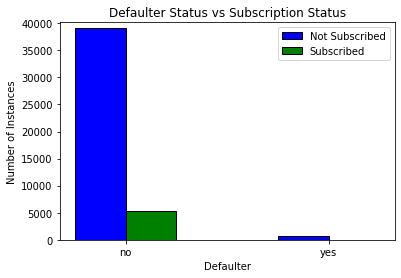

In [52]:
width = 0.25
plt.bar(np.arange(0, len(cross_tables[3])), cross_tables[3]['no'], color='blue', width=width, edgecolor='black', label='Not Subscribed')
plt.bar(np.arange(0, len(cross_tables[3]))+width, cross_tables[3]['yes'], width=width, color='green', edgecolor='black', label='Subscribed')
plt.xticks(np.arange(0, len(cross_tables[3])) + width/2, unique_val_count['default'].keys())
plt.xlabel('Defaulter')
plt.ylabel('Number of Instances')
plt.ylim([0, max((list(cross_tables[3]['no'])) + list(cross_tables[3]['yes']))+1000])
plt.legend()
plt.title('Defaulter Status vs Subscription Status')
plt.show()

### Housing Status vs Subscription Status

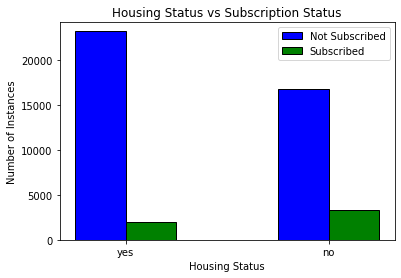

In [53]:
width = 0.25
plt.bar(np.arange(0, len(cross_tables[4])), cross_tables[4]['no'], color='blue', width=width, edgecolor='black', label='Not Subscribed')
plt.bar(np.arange(0, len(cross_tables[4]))+width, cross_tables[4]['yes'], width=width, color='green', edgecolor='black', label='Subscribed')
plt.xticks(np.arange(0, len(cross_tables[4])) + width/2, unique_val_count['housing'].keys())
plt.xlabel('Housing Status')
plt.ylabel('Number of Instances')
plt.ylim([0, max((list(cross_tables[4]['no'])) + list(cross_tables[4]['yes']))+1000])
plt.legend()
plt.title('Housing Status vs Subscription Status')
plt.show()

### Loan status vs Subscription Status

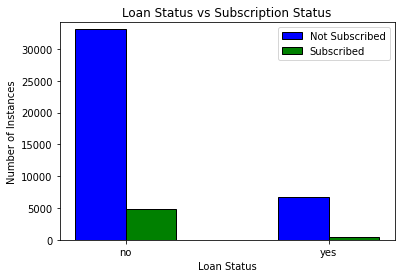

In [54]:
width = 0.25
plt.bar(np.arange(0, len(cross_tables[5])), cross_tables[5]['no'], color='blue', width=width, edgecolor='black', label='Not Subscribed')
plt.bar(np.arange(0, len(cross_tables[5]))+width, cross_tables[5]['yes'], width=width, color='green', edgecolor='black', label='Subscribed')
plt.xticks(np.arange(0, len(cross_tables[5])) + width/2, unique_val_count['loan'].keys())
plt.xlabel('Loan Status')
plt.ylabel('Number of Instances')
plt.ylim([0, max((list(cross_tables[5]['no'])) + list(cross_tables[5]['yes']))+1000])
plt.legend()
plt.title('Loan Status vs Subscription Status')
plt.show()

### Contact type vs Subscription Status

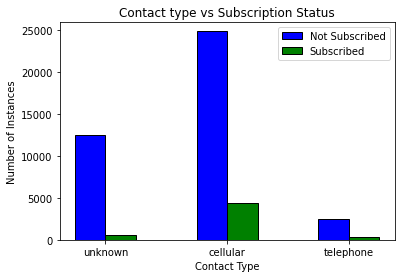

In [55]:
width = 0.25
plt.bar(np.arange(0, len(cross_tables[6])), cross_tables[6]['no'], color='blue', width=width, edgecolor='black', label='Not Subscribed')
plt.bar(np.arange(0, len(cross_tables[6]))+width, cross_tables[6]['yes'], width=width, color='green', edgecolor='black', label='Subscribed')
plt.xticks(np.arange(0, len(cross_tables[6])) + width/2, unique_val_count['contact'].keys())
plt.xlabel('Contact Type')
plt.ylabel('Number of Instances')
plt.ylim([0, max((list(cross_tables[6]['no'])) + list(cross_tables[6]['yes']))+1000])
plt.legend()
plt.title('Contact type vs Subscription Status')
plt.show()

### Last Day contacted vs Subscription Status

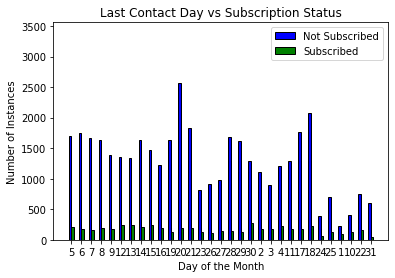

In [56]:
width = 0.25
plt.bar(np.arange(0, len(cross_tables[7])), cross_tables[7]['no'], color='blue', width=width, edgecolor='black', label='Not Subscribed')
plt.bar(np.arange(0, len(cross_tables[7]))+width, cross_tables[7]['yes'], width=width, color='green', edgecolor='black', label='Subscribed')
plt.xticks(np.arange(0, len(cross_tables[7])) + width/2, unique_val_count['day'].keys())
plt.xlabel('Day of the Month')
plt.ylabel('Number of Instances')
plt.ylim([0, max((list(cross_tables[7]['no'])) + list(cross_tables[7]['yes']))+1000])
plt.legend()
plt.title('Last Contact Day vs Subscription Status')
plt.show()

### Last contact month vs Subscription Status

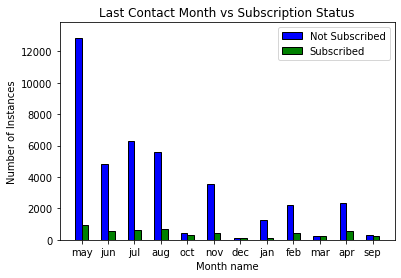

In [57]:
width = 0.25
plt.bar(np.arange(0, len(cross_tables[8])), cross_tables[8]['no'], color='blue', width=width, edgecolor='black', label='Not Subscribed')
plt.bar(np.arange(0, len(cross_tables[8]))+width, cross_tables[8]['yes'], width=width, color='green', edgecolor='black', label='Subscribed')
plt.xticks(np.arange(0, len(cross_tables[8])) + width/2, unique_val_count['month'].keys())
plt.xlabel('Month name')
plt.ylabel('Number of Instances')
plt.ylim([0, max((list(cross_tables[8]['no'])) + list(cross_tables[8]['yes']))+1000])
plt.legend()
plt.title('Last Contact Month vs Subscription Status')
plt.show()

### Outcome of previous campaign vs Subscription Status

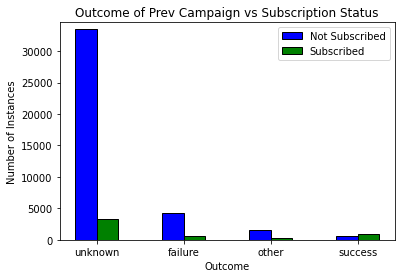

In [58]:
width = 0.25
plt.bar(np.arange(0, len(cross_tables[9])), cross_tables[9]['no'], color='blue', width=width, edgecolor='black', label='Not Subscribed')
plt.bar(np.arange(0, len(cross_tables[9]))+width, cross_tables[9]['yes'], width=width, color='green', edgecolor='black', label='Subscribed')
plt.xticks(np.arange(0, len(cross_tables[9])) + width/2, unique_val_count['poutcome'].keys())
plt.xlabel('Outcome')
plt.ylabel('Number of Instances')
plt.ylim([0, max((list(cross_tables[9]['no'])) + list(cross_tables[9]['yes']))+1000])
plt.legend()
plt.title('Outcome of Prev Campaign vs Subscription Status')
plt.show()

# Data Visualization after PCA

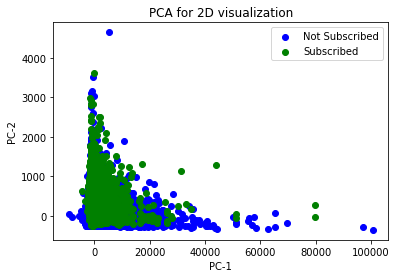

In [59]:
from sklearn.decomposition import PCA

y = y.map({'yes' : 1, 'no' : 0})
X = np.array(X)
y = np.array(y)

X_pca = PCA(n_components=2).fit_transform(X)

x_no = []
x_yes = []
for i in range(len(y)):
    if y[i] == 0:
        x_no.append(X_pca[i])
    else:
        x_yes.append(X_pca[i])

x_no = np.array(x_no)
x_yes = np.array(x_yes)

plt.scatter(x_no[:,0], x_no[:,1], color='blue', label='Not Subscribed')
plt.scatter(x_yes[:,0], x_yes[:,1], color='green', label='Subscribed')
plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.legend()
plt.title('PCA for 2D visualization')
plt.show()

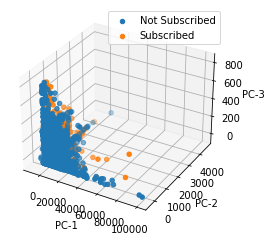

In [60]:
X_pca = PCA(n_components=3).fit_transform(X)

x_no = []
x_yes = []
for i in range(len(y)):
    if y[i] == 0:
        x_no.append(X_pca[i])
    else:
        x_yes.append(X_pca[i])

x_no = np.array(x_no)
x_yes = np.array(x_yes)

plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x_no[:,0], x_no[:,1], x_no[:,2], cmap='Blues')
ax.scatter3D(x_yes[:,0], x_yes[:,1], x_yes[:,2], cmap='Reds')
ax.set_xlabel('PC-1')
ax.set_ylabel('PC-2')
ax.set_zlabel('PC-3')
plt.legend(['Not Subscribed', 'Subscribed'])
plt.show()

# Data Normalization

In [61]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:2]
#scaler = MinMaxScaler().fit(train)
#X_scaled = scaler.transform(train)

array([[ 1.60696496, -1.13808302, -0.74066636, -1.08356042, -0.13548989,
         0.25641925, -0.89391541, -0.43680347, -1.41210845, -1.55754973,
        -0.92484102,  0.0110161 , -0.56935064, -0.41145311, -0.25194037,
        -0.41528717],
       [ 0.28852927, -0.81532633,  0.70245839, -0.05154268, -0.13548989,
        -0.43789469, -0.89391541, -0.43680347, -1.41210845, -1.55754973,
        -0.92484102, -0.41612696, -0.56935064, -0.41145311, -0.25194037,
        -0.41528717]])

# Data Splitting

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2)
print(f"Train size : {len(X_train)}\tValidation size : {len(X_val)}")

Train size : 36168	Validation size : 9043


# Model Selection

In [63]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, RocCurveDisplay
import copy, pickle
from sklearn.model_selection import cross_val_score

models_path = 'D:\IIT JODHPUR\Semester-3\ML for Business\Course Project\\best_models'

## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

C = [0.001, 0.01, 0.1, 1, 10]
ALL_MODELS = []

best_model = {'C' : 0, 'acc' : 0, 'f1' : 0, 'model' : None}
for c in C:
    model = LogisticRegression(C=c, class_weight='balanced')
    scores = cross_val_score(model, X, y, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_true=y_val, y_pred=y_pred)
    f1 = f1_score(y_true=y_val, y_pred=y_pred, average='weighted')
    print(f"C : {c:.3f}\tAccuracy : {acc:.3f}\tF1 Score : {f1:.3f}")
    ALL_MODELS.append(pd.Series({'C' : c, 'cv_score_fold1' : scores[0], 'cv_score_fold2' : scores[1], 'cv_score_fold3' : scores[2], 'cv_score_fold4' : scores[3], 'cv_score_fold5' : scores[4], 'mean' : scores.mean(), 'std' : scores.std(), 'accuracy' : acc, 'f1_score' : f1}))
    if best_model['f1'] < f1:
        best_model = {'C' : c, 'acc' : acc, 'f1' : f1, 'model' : copy.deepcopy(model)}

y_pred = best_model['model'].predict(X_val)
print(f"Best Model based on Validation Accuracy : {best_model}\nValidation Accuracy : {accuracy_score(y_true=y_val, y_pred=y_pred)}\nTest F1-Score : {f1_score(y_true=y_val, y_pred=y_pred, average='weighted')}")

name = f"logreg_{best_model['C']}_{best_model['acc']:.2f}_{best_model['f1']:.2f}"
pickle.dump(best_model['model'], open(os.path.join(models_path, name), 'wb'))

result = pd.DataFrame(ALL_MODELS)
result

c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C : 0.001	Accuracy : 0.826	F1 Score : 0.850


c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C : 0.010	Accuracy : 0.826	F1 Score : 0.850


c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C : 0.100	Accuracy : 0.826	F1 Score : 0.850


c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C : 1.000	Accuracy : 0.826	F1 Score : 0.850


c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

C : 10.000	Accuracy : 0.826	F1 Score : 0.850
Best Model based on Validation Accuracy : {'C': 0.001, 'acc': 0.8264956319805374, 'f1': 0.8503038288499886, 'model': LogisticRegression(C=0.001, class_weight='balanced')}
Validation Accuracy : 0.8264956319805374
Test F1-Score : 0.8503038288499886


c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,C,cv_score_fold1,cv_score_fold2,cv_score_fold3,cv_score_fold4,cv_score_fold5,mean,std,accuracy,f1_score
0,0.001,0.856906,0.826698,0.840080,0.284119,0.669985,0.695557,0.216358,0.826496,0.850304
1,0.010,0.863320,0.811436,0.838310,0.276709,0.687680,0.695491,0.217920,0.825832,0.849926
2,0.100,0.865310,0.806348,0.841739,0.254369,0.686021,0.690757,0.226752,0.826053,0.850095
3,1.000,0.870176,0.809998,0.864189,0.278257,0.671422,0.698808,0.222123,0.826164,0.850179
4,10.000,0.869402,0.806791,0.865295,0.276266,0.673413,0.698233,0.222560,0.826164,0.850179


0.8166431497120059


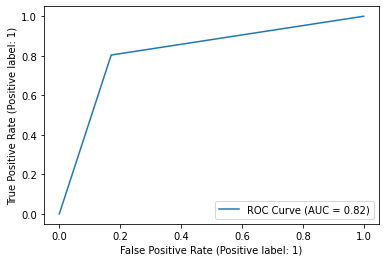

In [65]:
y_pred = best_model['model'].predict(X_val)
print(roc_auc_score(y_true=y_val, y_score=y_pred))
RocCurveDisplay.from_predictions(y_true=y_val, y_pred=y_pred, name="ROC Curve")

## Kernel SVM (Polynomial)

In [ ]:
from sklearn.svm import SVC

C = [0.001, 0.01, 0.1, 1, 10]
ALL_MODELS = []

best_model = {'C' : 0, 'acc' : 0, 'f1' : 0, 'model' : None}
for c in C:
    model = SVC(C=c, kernel='poly', class_weight='balanced')
    scores = cross_val_score(model, X, y, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_true=y_val, y_pred=y_pred)
    f1 = f1_score(y_true=y_val, y_pred=y_pred, average='weighted')
    print(f"C : {c:.3f}\tAccuracy : {acc:.3f}\tF1 Score : {f1:.3f}")
    ALL_MODELS.append(pd.Series({'C' : c, 'cv_score_fold1' : scores[0], 'cv_score_fold2' : scores[1], 'cv_score_fold3' : scores[2], 'cv_score_fold4' : scores[3], 'cv_score_fold5' : scores[4], 'mean' : scores.mean(), 'std' : scores.std(), 'accuracy' : acc, 'f1_score' : f1}))
    if best_model['f1'] < f1:
        best_model = {'C' : c, 'acc' : acc, 'f1' : f1, 'model' : copy.deepcopy(model)}

y_pred = best_model['model'].predict(X_val)
print(f"Best Model based on Validation Accuracy : {best_model}\nValidation Accuracy : {accuracy_score(y_true=y_val, y_pred=y_pred)}\nTest F1-Score : {f1_score(y_true=y_val, y_pred=y_pred, average='weighted')}")

name = f"svm_poly_{best_model['C']}_{best_model['acc']:.2f}_{best_model['f1']:.2f}"
pickle.dump(best_model['model'], open(os.path.join(models_path, name), 'wb'))

result = pd.DataFrame(ALL_MODELS)
result

In [24]:
name = f"svm_poly_{best_model['C']}_{best_model['acc']:.2f}_{best_model['f1']:.2f}"
pickle.dump(best_model['model'], open(os.path.join(models_path, name), 'wb'))

result = pd.DataFrame(ALL_MODELS)
result

,C,cv_score_fold1,cv_score_fold2,cv_score_fold3,cv_score_fold4,cv_score_fold5,mean,std,accuracy,f1_score
0,0.001,0.882008,0.881553,0.879451,0.874253,0.874806,0.878414,0.003292,0.897600,0.887315
1,0.010,0.880902,0.880889,0.877682,0.863747,0.863305,0.873305,0.008072,0.874820,0.884108
2,0.100,0.887980,0.888741,0.879341,0.861646,0.858438,0.875229,0.012872,0.847175,0.865838
3,1.000,0.907995,0.891396,0.883765,0.847047,0.849259,0.875892,0.023976,0.838217,0.859652
4,10.000,0.919053,0.890069,0.886419,0.810551,0.831343,0.867487,0.040189,0.836337,0.858536


0.6673107067279163


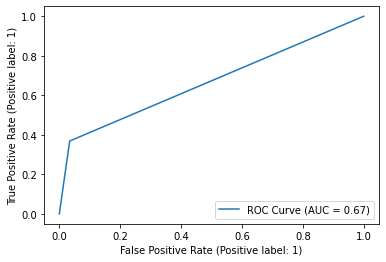

In [25]:
y_pred = best_model['model'].predict(X_val)
print(roc_auc_score(y_true=y_val, y_score=y_pred))
RocCurveDisplay.from_predictions(y_true=y_val, y_pred=y_pred, name="ROC Curve")

## Kernel SVM (RBF)

In [22]:
from sklearn.svm import SVC

C = [0.001, 0.01, 0.1, 1, 10]
ALL_MODELS = []

best_model = {'C' : 0, 'acc' : 0, 'f1' : 0, 'model' : None}
for c in C:
    model = SVC(C=c, kernel='rbf', class_weight='balanced')
    scores = cross_val_score(model, X, y, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_true=y_val, y_pred=y_pred)
    f1 = f1_score(y_true=y_val, y_pred=y_pred, average='weighted')
    #print(f"C : {c:.3f}\tAccuracy : {acc:.3f}\tF1 Score : {f1:.3f}")
    ALL_MODELS.append(pd.Series({'C' : c, 'cv_score_fold1' : scores[0], 'cv_score_fold2' : scores[1], 'cv_score_fold3' : scores[2], 'cv_score_fold4' : scores[3], 'cv_score_fold5' : scores[4], 'mean' : scores.mean(), 'std' : scores.std(), 'accuracy' : acc, 'f1_score' : f1}))
    if best_model['f1'] < f1:
        best_model = {'C' : c, 'acc' : acc, 'f1' : f1, 'model' : copy.deepcopy(model)}

y_pred = best_model['model'].predict(X_val)
print(f"Best Model based on Validation Accuracy : {best_model}\nValidation Accuracy : {accuracy_score(y_true=y_val, y_pred=y_pred)}\nTest F1-Score : {f1_score(y_true=y_val, y_pred=y_pred, average='weighted')}")

name = f"svm_rbf_{best_model['C']}_{best_model['acc']:.2f}_{best_model['f1']:.2f}"
pickle.dump(best_model['model'], open(os.path.join(models_path, name), 'wb'))

result = pd.DataFrame(ALL_MODELS)
result

Best Model based on Validation Accuracy : {'C': 10, 'acc': 0.8355634192192857, 'f1': 0.8576250951366612, 'model': SVC(C=10, class_weight='balanced')}
Validation Accuracy : 0.8355634192192857
Test F1-Score : 0.8576250951366612


,C,cv_score_fold1,cv_score_fold2,cv_score_fold3,cv_score_fold4,cv_score_fold5,mean,std,accuracy,f1_score
0,0.001,0.771757,0.771843,0.737669,0.690445,0.737669,0.741876,0.029905,0.732058,0.779582
1,0.010,0.776180,0.772285,0.762553,0.688564,0.739328,0.747782,0.032259,0.802610,0.833967
2,0.100,0.808471,0.806016,0.844282,0.732250,0.718978,0.781999,0.048173,0.813668,0.842732
3,1.000,0.812230,0.796395,0.846715,0.704048,0.647091,0.761296,0.074085,0.820303,0.847588
4,10.000,0.814332,0.790312,0.829684,0.648640,0.655607,0.747715,0.079083,0.835563,0.857625


AUC Score : 0.813


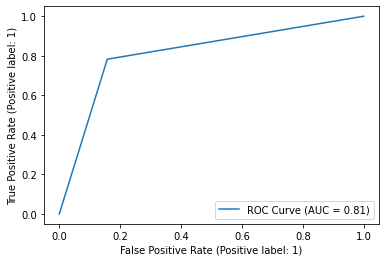

In [23]:
y_pred = best_model['model'].predict(X_val)
print(f"AUC Score : {roc_auc_score(y_true=y_val, y_score=y_pred):.3f}")
RocCurveDisplay.from_predictions(y_true=y_val, y_pred=y_pred, name="ROC Curve")

## Linear SVM

In [24]:
from sklearn.svm import LinearSVC

C = [0.001, 0.01, 0.1, 1, 10]
ALL_MODELS = []

best_model = {'C' : 0, 'acc' : 0, 'f1' : 0, 'model' : None}
for c in C:
    model = LinearSVC(C=c, class_weight='balanced')
    scores = cross_val_score(model, X, y, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_true=y_val, y_pred=y_pred)
    f1 = f1_score(y_true=y_val, y_pred=y_pred, average='weighted')
    #print(f"C : {c:.3f}\tAccuracy : {acc:.3f}\tF1 Score : {f1:.3f}")
    ALL_MODELS.append(pd.Series({'C' : c, 'cv_score_fold1' : scores[0], 'cv_score_fold2' : scores[1], 'cv_score_fold3' : scores[2], 'cv_score_fold4' : scores[3], 'cv_score_fold5' : scores[4], 'mean' : scores.mean(), 'std' : scores.std(), 'accuracy' : acc, 'f1_score' : f1}))
    if best_model['f1'] < f1:
        best_model = {'C' : c, 'acc' : acc, 'f1' : f1, 'model' : copy.deepcopy(model)}

y_pred = best_model['model'].predict(X_val)
print(f"Best Model based on Validation Accuracy : {best_model}\nValidation Accuracy : {accuracy_score(y_true=y_val, y_pred=y_pred)}\nTest F1-Score : {f1_score(y_true=y_val, y_pred=y_pred, average='weighted')}")

name = f"svm_linear_{best_model['C']}_{best_model['acc']:.2f}_{best_model['f1']:.2f}"
pickle.dump(best_model['model'], open(os.path.join(models_path, name), 'wb'))

result = pd.DataFrame(ALL_MODELS)
result

c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

Best Model based on Validation Accuracy : {'C': 10, 'acc': 0.8553577352648457, 'f1': 0.8707695093143715, 'model': LinearSVC(C=10, class_weight='balanced')}
Validation Accuracy : 0.8553577352648457
Test F1-Score : 0.8707695093143715


c:\Users\ayana\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,C,cv_score_fold1,cv_score_fold2,cv_score_fold3,cv_score_fold4,cv_score_fold5,mean,std,accuracy,f1_score
0,0.001,0.902134,0.880889,0.888078,0.621986,0.857554,0.830128,0.105067,0.822625,0.848022
1,0.010,0.904899,0.719199,0.883101,0.190998,0.871157,0.713871,0.269553,0.824284,0.849211
2,0.100,0.882782,0.884096,0.216434,0.542690,0.885534,0.682307,0.267858,0.824505,0.849401
3,1.000,0.883114,0.765760,0.887525,0.845941,0.882659,0.853000,0.046128,0.823842,0.848854
4,10.000,0.875484,0.835213,0.700288,0.847158,0.720969,0.795822,0.071081,0.855358,0.870770


AUC Score : 0.793


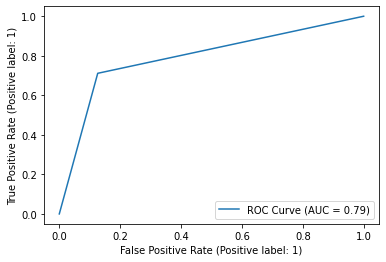

In [25]:
y_pred = best_model['model'].predict(X_val)
print(f"AUC Score : {roc_auc_score(y_true=y_val, y_score=y_pred):.3f}")
RocCurveDisplay.from_predictions(y_true=y_val, y_pred=y_pred, name="ROC Curve")

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

best_model = {'depth' : 0, 'acc' : 0, 'f1' : 0, 'model' : None}
ALL_MODELS = []

for i in range(1, 11):
    model = DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(model, X, y, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_true=y_val, y_pred=y_pred)
    f1 = f1_score(y_true=y_val, y_pred=y_pred, average='weighted')
    #print(f"Depth : {c:.3f}\tAccuracy : {acc:.3f}\tF1 Score : {f1:.3f}")
    ALL_MODELS.append(pd.Series({'depth' : i, 'cv_score_fold1' : scores[0], 'cv_score_fold2' : scores[1], 'cv_score_fold3' : scores[2], 'cv_score_fold4' : scores[3], 'cv_score_fold5' : scores[4], 'mean' : scores.mean(), 'std' : scores.std(), 'accuracy' : acc, 'f1_score' : f1}))
    if best_model['f1'] < f1:
        best_model = {'depth' : i, 'acc' : acc, 'f1' : f1, 'model' : copy.deepcopy(model)}

y_pred = best_model['model'].predict(X_val)
print(f"Best Model based on Validation Accuracy : {best_model}\nValidation Accuracy : {accuracy_score(y_true=y_val, y_pred=y_pred)}\nTest F1-Score : {f1_score(y_true=y_val, y_pred=y_pred, average='weighted')}")

name = f"dtree_{best_model['depth']}_{best_model['acc']:.2f}_{best_model['f1']:.2f}"
pickle.dump(best_model['model'], open(os.path.join(models_path, name), 'wb'))

result = pd.DataFrame(ALL_MODELS)
result

Best Model based on Validation Accuracy : {'depth': 8, 'acc': 0.9016919163994249, 'f1': 0.8985275975658432, 'model': DecisionTreeClassifier(max_depth=8)}
Validation Accuracy : 0.9016919163994249
Test F1-Score : 0.8985275975658432


,depth,cv_score_fold1,cv_score_fold2,cv_score_fold3,cv_score_fold4,cv_score_fold5,mean,std,accuracy,f1_score
0,1.0,0.883003,0.883101,0.882990,0.882990,0.882990,0.883015,0.000043,0.886984,0.833861
1,2.0,0.883003,0.884428,0.870714,0.398142,0.873369,0.781931,0.191968,0.890412,0.887267
2,3.0,0.883003,0.809113,0.883212,0.396483,0.832780,0.760918,0.184478,0.900476,0.887109
3,4.0,0.883114,0.800708,0.871489,0.537602,0.809666,0.780516,0.125751,0.900476,0.887261
4,5.0,0.883003,0.802367,0.716656,0.445587,0.721522,0.713827,0.147295,0.901802,0.893772
5,6.0,0.883003,0.829352,0.831785,0.528091,0.719420,0.758330,0.126891,0.900807,0.894109
6,7.0,0.889528,0.805685,0.838974,0.457863,0.720305,0.742471,0.152596,0.899149,0.890263
7,8.0,0.881676,0.812984,0.816412,0.474453,0.491705,0.695446,0.175202,0.901692,0.898528
8,9.0,0.882119,0.815970,0.816191,0.499558,0.499005,0.702568,0.167726,0.900476,0.895583
9,10.0,0.884773,0.788542,0.815085,0.479208,0.497346,0.692991,0.170175,0.895720,0.892624


AUC Score : 0.725


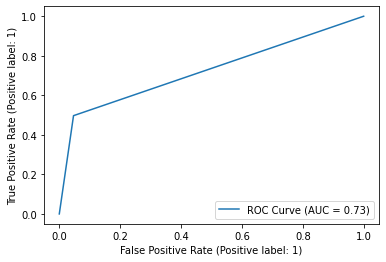

In [27]:
y_pred = best_model['model'].predict(X_val)
print(f"AUC Score : {roc_auc_score(y_true=y_val, y_score=y_pred):.3f}")
RocCurveDisplay.from_predictions(y_true=y_val, y_pred=y_pred, name="ROC Curve")

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [i for i in range(100, 501, 50)]
max_depth = [i for i in range(1, 11)]
ALL_MODELS = []

best_model = {'max_depth' : 0, 'n_estimator' : 0, 'model' : None, 'acc' : 0, 'f1' : 0}
for depth in max_depth:
    for estimator in n_estimators:
        model = RandomForestClassifier(max_depth=depth, n_estimators=estimator)
        scores = cross_val_score(model, X, y, cv=5)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        f1 = f1_score(y_true=y_val, y_pred=y_pred, average='weighted')
        if f1 > best_model['f1']:
            best_model = {'depth' : depth, 'n_estimators' : estimator, 'acc' : acc, 'f1' : f1, 'model' : copy.deepcopy(model)}
            best_entry = pd.Series({'depth' : depth, 'n_estimator' : estimator, 'cv_score_fold1' : scores[0], 'cv_score_fold2' : scores[1], 'cv_score_fold3' : scores[2], 'cv_score_fold4' : scores[3], 'cv_score_fold5' : scores[4], 'mean' : scores.mean(), 'std' : scores.std(), 'accuracy' : acc, 'f1_score' : f1})
    ALL_MODELS.append(best_entry)

y_pred = best_model['model'].predict(X_val)
print(f"Best Model based on Mean Validation Accuracy : {best_model}\nTest Accuracy : {accuracy_score(y_true=y_val, y_pred=y_pred)}\nTest F1-Score : {f1_score(y_true=y_val, y_pred=y_pred, average='weighted')}")

name = f"rdf_{best_model['depth']}_{best_model['n_estimator']}_{best_model['acc']:.2f}_{best_model['f1']:.2f}"
pickle.dump(best_model['model'], open(os.path.join(models_path, name), 'wb'))

result = pd.DataFrame(ALL_MODELS)
result

Best Model based on Mean Validation Accuracy : {'depth': 10, 'n_estimators': 500, 'acc': 0.8957204467543957, 'f1': 0.8977363003560574, 'model': RandomForestClassifier(max_depth=10, n_estimators=500)}
Test Accuracy : 0.9092115448413137
Test F1-Score : 0.8977363003560574


KeyError: 'n_esimator'

In [30]:
name = f"rdf_{best_model['depth']}_{best_model['n_estimators']}_{best_model['acc']:.2f}_{best_model['f1']:.2f}"
pickle.dump(best_model['model'], open(os.path.join(models_path, name), 'wb'))

result = pd.DataFrame(ALL_MODELS)
result

,depth,n_estimator,cv_score_fold1,cv_score_fold2,cv_score_fold3,cv_score_fold4,cv_score_fold5,mean,std,accuracy,f1_score
0,1.0,100.0,0.883003,0.883101,0.882990,0.882990,0.883765,0.883170,0.000300,0.89572,0.833861
1,2.0,400.0,0.883003,0.883101,0.882990,0.884096,0.893055,0.885249,0.003925,0.89572,0.837013
2,3.0,500.0,0.883003,0.883322,0.884096,0.857222,0.878124,0.877154,0.010185,0.89572,0.861902
3,4.0,300.0,0.883003,0.883875,0.887746,0.759124,0.802588,0.843267,0.052804,0.89572,0.870560
4,5.0,150.0,0.883003,0.882216,0.872595,0.596771,0.730259,0.792969,0.113875,0.89572,0.871102
5,6.0,450.0,0.883003,0.867728,0.869498,0.535833,0.608494,0.752911,0.149452,0.89572,0.874399
6,7.0,350.0,0.883003,0.849259,0.864521,0.522230,0.570228,0.737848,0.157554,0.89572,0.882252
7,8.0,300.0,0.883003,0.839416,0.857885,0.515815,0.547113,0.728647,0.161895,0.89572,0.888941
8,9.0,200.0,0.883003,0.831232,0.850807,0.511060,0.454324,0.706085,0.184024,0.89572,0.894344
9,10.0,500.0,0.883003,0.828467,0.836209,0.511944,0.336319,0.679189,0.216338,0.89572,0.897736


AUC Score : 0.676


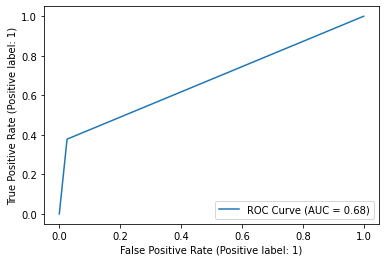

In [ ]:
y_pred = best_model['model'].predict(X_val)
print(f"AUC Score : {roc_auc_score(y_true=y_val, y_score=y_pred):.3f}")
RocCurveDisplay.from_predictions(y_true=y_val, y_pred=y_pred, name="ROC Curve")

# Feature Importance

In [66]:
import os, pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

models_path = 'D:\IIT JODHPUR\Semester-3\ML for Business\Course Project\\best_models'
all_models = os.listdir(models_path)

df = pd.read_csv('Val_Standardized.csv')
y = df['y']
X = df.drop('y', axis=1)
X = X.drop('Unnamed: 0', axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.382703,-0.169813,-0.740666,2.012493,-0.13549,-0.235906,-0.893915,-0.436803,2.225971,-0.958642,-0.924841,0.636198,-0.246560,-0.411453,-0.251940,-0.415287
1,-0.559037,-0.169813,-0.740666,-0.051543,-0.13549,-0.299623,1.118674,-0.436803,0.406931,-0.239953,0.647631,-0.633582,-0.246560,-0.411453,-0.251940,-0.415287
2,-0.464863,0.152944,-0.740666,2.012493,-0.13549,-0.447419,1.118674,-0.436803,0.406931,-0.120171,0.018642,-0.078296,-0.246560,-0.411453,-0.251940,-0.415287
3,1.795313,1.121214,-0.740666,-1.083560,-0.13549,0.950405,-0.893915,-0.436803,0.406931,-0.479516,0.018642,-0.074413,0.076230,7.198833,0.182198,2.448149
4,0.665225,-0.815326,-0.740666,-0.051543,-0.13549,-0.447419,-0.893915,-0.436803,0.406931,-0.120171,-0.295852,-0.567569,-0.569351,-0.411453,-0.251940,-0.415287


In [67]:
X = np.array(X)
y = np.array(y)

In [68]:
X[0].shape

(16,)

In [69]:
model_r = {}
for m in all_models:
    model = pickle.load(open(os.path.join(models_path, m), 'rb'))
    r = permutation_importance(model, X, y, n_repeats=5)
    model_r[m] = r

In [78]:
columns = columns = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']

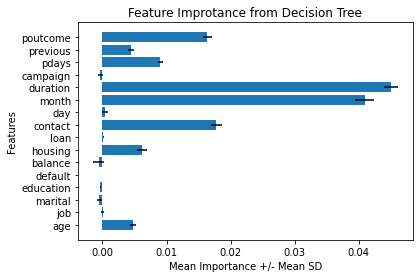

In [79]:
algo = "dtree_8_0.90_0.90"
importance = model_r[algo]

plt.barh(range(len(importance['importances_mean'])), importance['importances_mean'], xerr=importance['importances_std'])
plt.yticks(range(len(importance['importances_mean'])), columns)
plt.ylabel('Features')
plt.xlabel('Mean Importance +/- Mean SD')
plt.title('Feature Improtance from Decision Tree')
plt.show()

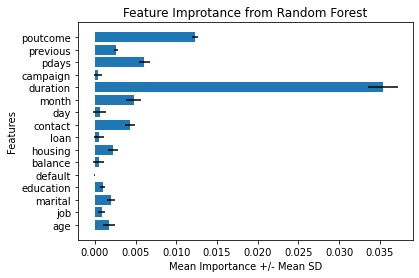

In [80]:
algo = "rdf_10_500_0.90_0.90"
importance = model_r[algo]

plt.barh(range(len(importance['importances_mean'])), importance['importances_mean'], xerr=importance['importances_std'])
plt.yticks(range(len(importance['importances_mean'])), columns)
plt.ylabel('Features')
plt.xlabel('Mean Importance +/- Mean SD')
plt.title('Feature Improtance from Random Forest')
plt.show()

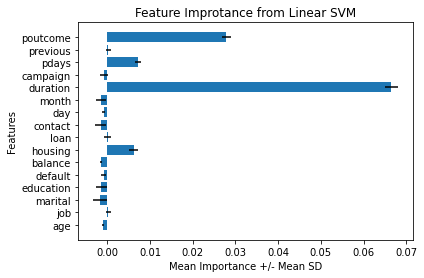

In [81]:
algo = "svm_linear_10_0.86_0.87"
importance = model_r[algo]

plt.barh(range(len(importance['importances_mean'])), importance['importances_mean'], xerr=importance['importances_std'])
plt.yticks(range(len(importance['importances_mean'])), columns)
plt.ylabel('Features')
plt.xlabel('Mean Importance +/- Mean SD')
plt.title('Feature Improtance from Linear SVM')
plt.show()

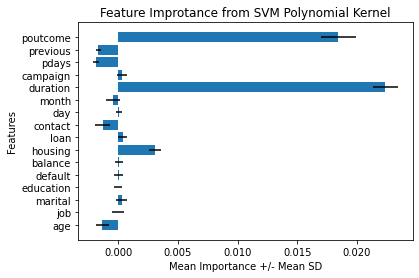

In [82]:
algo = "svm_poly_0.001_0.90_0.89"
importance = model_r[algo]

plt.barh(range(len(importance['importances_mean'])), importance['importances_mean'], xerr=importance['importances_std'])
plt.yticks(range(len(importance['importances_mean'])), columns)
plt.ylabel('Features')
plt.xlabel('Mean Importance +/- Mean SD')
plt.title('Feature Improtance from SVM Polynomial Kernel')
plt.show()

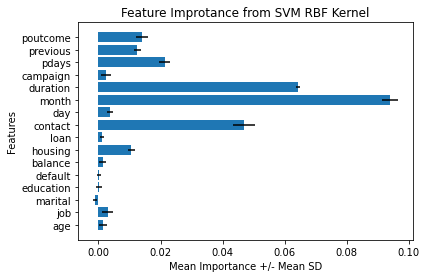

In [83]:
algo = "svm_rbf_10_0.84_0.86"
importance = model_r[algo]

plt.barh(range(len(importance['importances_mean'])), importance['importances_mean'], xerr=importance['importances_std'])
plt.yticks(range(len(importance['importances_mean'])), columns)
plt.ylabel('Features')
plt.xlabel('Mean Importance +/- Mean SD')
plt.title('Feature Improtance from SVM RBF Kernel')
plt.show()

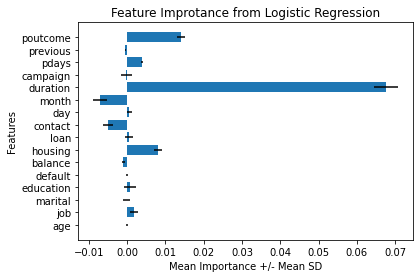

In [84]:
algo = "logreg_0.001_0.83_0.85"
importance = model_r[algo]

plt.barh(range(len(importance['importances_mean'])), importance['importances_mean'], xerr=importance['importances_std'])
plt.yticks(range(len(importance['importances_mean'])), columns)
plt.ylabel('Features')
plt.xlabel('Mean Importance +/- Mean SD')
plt.title('Feature Improtance from Logistic Regression')
plt.show()

In [86]:
importance_matrix = []
for f in range(16):
    data = pd.Series({'svm_poly' : f"{model_r['svm_poly_0.001_0.90_0.89']['importances_mean'][f]:.4f} +/- {model_r['svm_poly_0.001_0.90_0.89']['importances_std'][f]:.4f}",
                    'svm_rbf' : f"{model_r['svm_rbf_10_0.84_0.86']['importances_mean'][f]:.4f} +/- {model_r['svm_rbf_10_0.84_0.86']['importances_std'][f]:.4f}",
                    'linsvm' : f"{model_r['svm_linear_10_0.86_0.87']['importances_mean'][f]:.4f} +/- {model_r['svm_linear_10_0.86_0.87']['importances_std'][f]:.4f}",
                    'Dtree' : f"{model_r['dtree_8_0.90_0.90']['importances_mean'][f]:.4f} +/- {model_r['dtree_8_0.90_0.90']['importances_std'][f]:.4f}",
                    'RDF' : f"{model_r['rdf_10_500_0.90_0.90']['importances_mean'][f]:.4f} +/- {model_r['rdf_10_500_0.90_0.90']['importances_std'][f]:.4f}",
                    'LogReg' : f"{model_r['logreg_0.001_0.83_0.85']['importances_mean'][f]:.4f} +/- {model_r['logreg_0.001_0.83_0.85']['importances_std'][f]:.4f}"})
    importance_matrix.append(data)

result = pd.DataFrame(importance_matrix)
result

,svm_poly,svm_rbf,linsvm,Dtree,RDF,LogReg
0,-0.0013 +/- 0.0005,0.0014 +/- 0.0014,-0.0010 +/- 0.0002,0.0048 +/- 0.0004,0.0018 +/- 0.0007,0.0000 +/- 0.0002
1,0.0000 +/- 0.0005,0.0030 +/- 0.0018,0.0003 +/- 0.0005,0.0000 +/- 0.0002,0.0008 +/- 0.0005,0.0017 +/- 0.0011
2,0.0003 +/- 0.0005,-0.0011 +/- 0.0006,-0.0016 +/- 0.0017,-0.0005 +/- 0.0004,0.0020 +/- 0.0005,-0.0001 +/- 0.0009
3,-0.0000 +/- 0.0003,0.0002 +/- 0.0010,-0.0014 +/- 0.0013,-0.0003 +/- 0.0001,0.0010 +/- 0.0003,0.0007 +/- 0.0015
4,0.0000 +/- 0.0004,0.0001 +/- 0.0006,-0.0008 +/- 0.0005,0.0000 +/- 0.0000,0.0000 +/- 0.0001,0.0001 +/- 0.0003
5,0.0001 +/- 0.0003,0.0013 +/- 0.0012,-0.0015 +/- 0.0003,-0.0006 +/- 0.0009,0.0005 +/- 0.0007,-0.0010 +/- 0.0004
6,0.0031 +/- 0.0005,0.0106 +/- 0.0012,0.0062 +/- 0.0011,0.0061 +/- 0.0007,0.0022 +/- 0.0006,0.0080 +/- 0.0010
7,0.0004 +/- 0.0003,0.0012 +/- 0.0006,0.0001 +/- 0.0008,0.0002 +/- 0.0001,0.0005 +/- 0.0006,0.0006 +/- 0.0011
8,-0.0013 +/- 0.0006,0.0468 +/- 0.0036,-0.0015 +/- 0.0013,0.0178 +/- 0.0008,0.0044 +/- 0.0006,-0.0049 +/- 0.0013
9,0.0001 +/- 0.0003,0.0037 +/- 0.0010,-0.0008 +/- 0.0003,0.0004 +/- 0.0005,0.0006 +/- 0.0008,0.0006 +/- 0.0005
